### Introduction to Recommendation Systems

In today’s data-rich environment, users often struggle to sift through vast amounts of information to find what truly interests them. Recommendation systems were developed to address this challenge, helping users discover relevant products or content based on their preferences and behaviors.

These systems establish connections between users and items by analyzing similarities, leveraging these insights to provide personalized recommendations.

#### What Can Recommendation Systems Solve?

1. **Finding Relevant Products**: They guide users in locating items that match their interests and needs.
  
2. **Enhancing User Engagement**: Recommendations can significantly boost interaction; for instance, Google News sees a 40% increase in clicks thanks to its recommendation algorithms.

3. **Targeted Item Delivery**: They assist providers in presenting the right products to the right users—Amazon reports that 35% of its sales stem from its recommendation engine.

4. **Personalizing Content**: Platforms like Netflix attribute a large portion of their rentals to recommendations, making the user experience more tailored and enjoyable.

### Types of Recommendation Systems

Recommendation systems can be categorized into six main types:

1. **Popularity-Based Systems**: These systems recommend items that are widely viewed and purchased, focusing on high ratings. They do not offer personalized suggestions.

2. **Classification Model-Based**: These systems analyze user features and apply classification algorithms to determine the likelihood of a user’s interest in a product.

3. **Content-Based Recommendations**: This approach relies on the attributes of the items themselves rather than user opinions. The idea is that if a user enjoys a particular item, they may also appreciate similar items.

4. **Collaborative Filtering**: This method is based on the assumption that users with similar tastes will enjoy similar items. It can be further divided into two types: a) User-User and b) Item-Item.

5. **Hybrid Approaches**: These systems integrate multiple recommendation methods, combining collaborative filtering, content-based filtering, and other techniques to enhance accuracy.

6. **Association Rule Mining**: This method identifies relationships between items based on their co-occurrence patterns in transactions, helping to reveal insights about customer behavior.

### Import Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
# Import the dataset and give the column names
df=pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df  = df[['UserId','ProductId','Score']]

In [6]:
#Check the number of rows and columns
rows,columns=df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  568454
Number of columns:  3


In [7]:
#Check the datatypes
df.dtypes

UserId       object
ProductId    object
Score         int64
dtype: object

In [8]:
#Taking subset of the dataset
df1=df.iloc[:1048576,0:]

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserId     568454 non-null  object
 1   ProductId  568454 non-null  object
 2   Score      568454 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


#### Handle missing values

In [10]:
df.isna().sum()

UserId       0
ProductId    0
Score        0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isna().sum()

UserId       0
ProductId    0
Score        0
dtype: int64

In [13]:
df.duplicated().sum()

5824

In [14]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df1.Score.min()))
print('Maximum rating is: %d' %(df1.Score.max()))

Minimum rating is: 1
Maximum rating is: 5


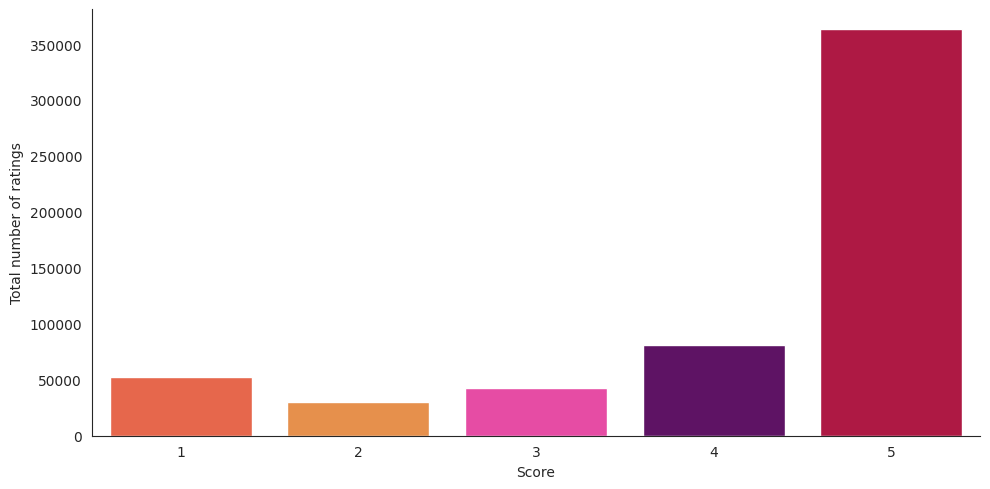

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the rating
# Define a custom color palette
custom_palette = ["#FF5733", "#FF8D33", "#FF33A8", "#6A0572","#C70039"]

# Check the distribution of the rating with custom colors
with sns.axes_style('white'):
    g = sns.catplot(x="Score", data=df1, aspect=2.0, kind='count', palette=custom_palette)
    g.set_ylabels("Total number of ratings")

# Show the plot
plt.show()


In [16]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', df1['UserId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', df1['ProductId'].nunique())

Number of unique users in Raw data =  256059
Number of unique product in Raw data =  74258


In [17]:
#Check the top 10 users based on ratings
most_rated = df1.groupby('UserId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
dtype: int64


In [18]:
counts = df1.UserId.value_counts()
df1_final = df1[df1.UserId.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(df1_final))
print('Number of unique users in the final data = ', df1_final['UserId'].nunique())
print('Number of unique products in the final data = ', df1_final['UserId'].nunique())

Number of users who have rated 25 or more items = 91490
Number of unique users in the final data =  3304
Number of unique products in the final data =  3304


### Filtering Based Recommendation System

In [20]:
def recommend_items(ratings_df):
    # Filter recommendations based on minimum rating
    filtered_recommendations = ratings_df[ratings_df['Score'] >= 4].head(50)
    
    return filtered_recommendations


recommendations = recommend_items(df)

if not recommendations.empty:
    for index, row in recommendations.iterrows():
        print("Product ID:", row['ProductId'], "Score:", row['Score'])
else:
    print("No recommendations found.")

Product ID: B001E4KFG0 Score: 5
Product ID: B000LQOCH0 Score: 4
Product ID: B006K2ZZ7K Score: 5
Product ID: B006K2ZZ7K Score: 4
Product ID: B006K2ZZ7K Score: 5
Product ID: B006K2ZZ7K Score: 5
Product ID: B000E7L2R4 Score: 5
Product ID: B00171APVA Score: 5
Product ID: B0001PB9FE Score: 5
Product ID: B0009XLVG0 Score: 5
Product ID: B001GVISJM Score: 4
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 4
Product ID: B00144C10S Score: 5
Product ID: B0001PB9FY Score: 5
Product ID: B003F6UO7K Score: 5
Product ID: B003F6UO7K Score: 5
Product ID: B001EO5QW8 Score: 4
Product ID: B001EO5QW8 Score: 4
Product ID: B001EO5QW8 Score: 5
Product ID: B001EO5QW8 Score: 4
Product 

### Rating Based By KMeans

In [21]:
from sklearn.cluster import KMeans

# Apply k-means clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_table)

# Example: Get recommendations for a given user
user_id = 2

# Get the cluster label for the given user
user_cluster_label = cluster_labels[user_id - 1]

# Get all users in the same cluster as the given user
users_in_same_cluster = pivot_table.index[cluster_labels == user_cluster_label]

# Get the average ratings of the users in the same cluster
average_ratings = pivot_table.loc[users_in_same_cluster].mean()

# Sort the average ratings in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Example: Get top-k recommendations
k = 5
top_k_recommendations = sorted_ratings.head(k)

# Print the top-k recommendations
print("Top", k, "recommendations for user", user_id, ":")
for product_id, rating in top_k_recommendations.items():
    print("Product ID:", product_id, "Rating:", rating)

Top 5 recommendations for user 2 :
Product ID: B002IEZJMA Rating: 0.35771065182829886
Product ID: B002IEVJRY Rating: 0.3573926868044515
Product ID: B006MONQMC Rating: 0.3112877583465819
Product ID: B0090X8IPM Rating: 0.2985691573926868
Product ID: B003GTR8IO Rating: 0.2985691573926868


### Analyzing the rating

In [22]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = df1.groupby(by='UserId')['Score'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
Name: Score, dtype: int64

In [23]:
no_of_rated_products_per_user.describe()


count    256059.000000
mean          2.220012
std           4.443361
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         448.000000
Name: Score, dtype: float64

In [24]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

<Axes: title={'center': 'Quantiles and their Values'}>

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

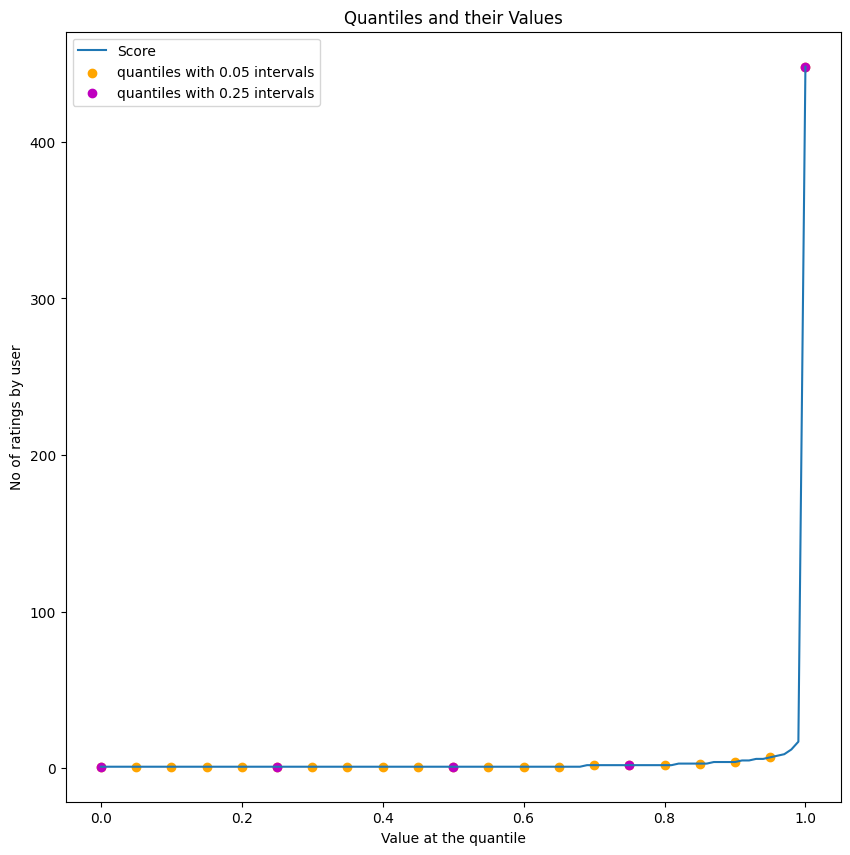

In [25]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [26]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 267



### Popularity Based Recommendation
Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. 

For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

In [27]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=df1.groupby("ProductId").filter(lambda x:x['Score'].count() >=50)

Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[Text(-250.0, 0, ''),
 Text(0.0, 0, ''),
 Text(250.0, 0, ''),
 Text(500.0, 0, ''),
 Text(750.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1250.0, 0, ''),
 Text(1500.0, 0, ''),
 Text(1750.0, 0, ''),
 Text(2000.0, 0, '')]

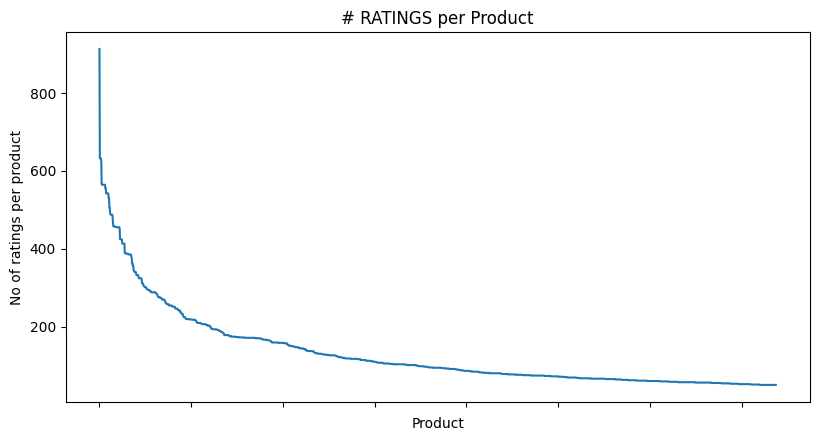

In [28]:
no_of_ratings_per_product = new_df.groupby(by='ProductId')['Score'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [29]:
ratings_mean_count = pd.DataFrame(new_df.groupby('ProductId')['Score'].mean())

In [30]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ProductId')['Score'].count())

In [31]:
ratings_mean_count['rating_counts'].max()

913

<Figure size 800x600 with 0 Axes>

<Axes: >

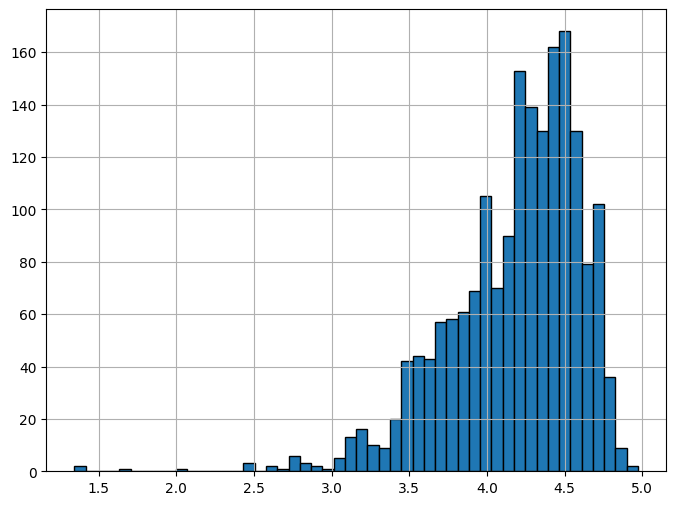

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Score'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

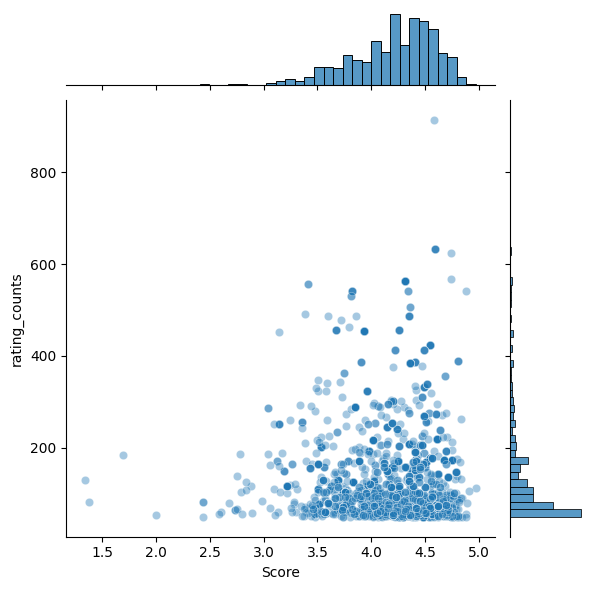

In [33]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Score', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<Axes: xlabel='ProductId'>

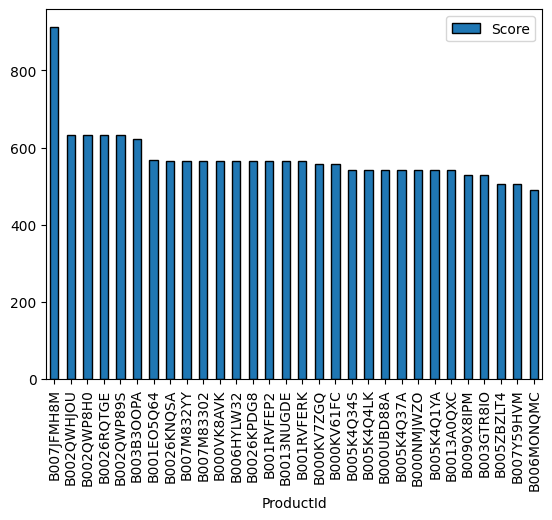

In [34]:
popular_products = pd.DataFrame(new_df.groupby('ProductId')['Score'].count())
most_popular = popular_products.sort_values('Score', ascending=False)
most_popular.head(30).plot(kind = "bar")

### Collaborative Filtering (Item-Item Recommendation)
Collaborative filtering (CF) is a widely adopted technique in recommendation systems that leverages the preferences and behaviors of users to suggest items. The core principle of CF is that individuals who have historically rated items similarly will continue to exhibit similar tastes in the future.

This method operates on the premise of utilizing the collective wisdom of a community—essentially filling in gaps in a user-item interaction matrix. 

For example, if User A and User B both liked similar product, and User A liked a new product that User B hasn't seen, that product might be recommended to User B.

In [35]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [36]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [37]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [38]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [39]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [40]:
test_pred

[Prediction(uid='A1B05INWIDZ74O', iid='B008RWUHA6', r_ui=5.0, est=4.904404394699901, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='AP1YHVQS65HNT', iid='B005DFL4PM', r_ui=5.0, est=4.955580396469401, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A1A9Q3CQA5Y28E', iid='B007RTR8T8', r_ui=3.0, est=3.866069039336366, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A7MHN8ZV8JPNT', iid='B000PDWBKO', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A36HQGRJWI5LSG', iid='B000H1217M', r_ui=5.0, est=5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='A186NOZW7YYOX2', iid='B0060JNAE8', r_ui=4.0, est=4.292307692307692, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2JI3ASA64PRAG', iid='B002ZX1U9A', r_ui=5.0, est=4.902106382342103, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A1S30PU4PBA42W', iid='B001EYUE5M', r_ui=5.0, est=5, details={'act

####  Root Mean Squared Error

In [41]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.7600


0.7600334634912401